In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
hr_raw=pd.read_csv(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\portfolio\Human resources Analysis\Raw\HR_Analytics.csv")

# Purpose of the analysis:

##### In this Power BI Dashboard, we used data from HR analytics to help an organization improve employee performance and retention (reduce attrition) by creating an HR Analytics Dashboard.

In [154]:
"""Variable	Description
satisfaction_level	Employee-reported job satisfaction level [0–1]	
last_evaluation	Score of employee's last performance review [0–1]	
number_project	Number of projects employee contributes to	
average_monthly_hours	Average number of hours employee worked per month	
time_spend_company	How long the employee has been with the company (years)
Work_accident	Whether or not the employee experienced an accident while at work
left	Whether or not the employee left the company
promotion_last_5years	Whether or not the employee was promoted in the last 5 years
Department	The employee's department
salary	The employee's salary (U.S. dollars)"""

"Variable\tDescription\nsatisfaction_level\tEmployee-reported job satisfaction level [0–1]\t\nlast_evaluation\tScore of employee's last performance review [0–1]\t\nnumber_project\tNumber of projects employee contributes to\t\naverage_monthly_hours\tAverage number of hours employee worked per month\t\ntime_spend_company\tHow long the employee has been with the company (years)\nWork_accident\tWhether or not the employee experienced an accident while at work\nleft\tWhether or not the employee left the company\npromotion_last_5years\tWhether or not the employee was promoted in the last 5 years\nDepartment\tThe employee's department\nsalary\tThe employee's salary (U.S. dollars)"

#####  They have the following question: what’s likely to make the employee leave the company?

#####  Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

#####  If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Data basic check

In [155]:
hr_raw.head(3)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0


In [156]:
hr_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

### Missing data(Null values check)

In [157]:
#Checking null values
hr_raw.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [158]:
#Because there's many columns, it is difficult to know the ones that have Nan values, we'll get them with this formula:
columns_with_na = []  # Initialize an empty list to store column names with NA
for col in hr_raw.columns:  # Iterate through all columns in the DataFrame
    if hr_raw[col].isna().sum() != 0:  # Check if there are any NaN values in the column
        columns_with_na.append(col)  #



In [159]:
#We just assessed that ['YearsWithCurrManager'] is the only variable with Nan values
columns_with_na

['YearsWithCurrManager']

##### Fixing variables with Nan values (['YearsWithCurrManager'])

In [160]:
hr_managercheck=hr_raw[["EmpID","YearsAtCompany","YearsWithCurrManager"]]

In [161]:
hr_managercheckna=hr_managercheck[hr_managercheck["YearsWithCurrManager"].isna()]
hr_managercheckna

,EmpID,YearsAtCompany,YearsWithCurrManager
28,RM024,0,NaN
31,RM363,3,NaN
45,RM207,4,NaN
99,RM139,2,NaN
100,RM256,4,NaN
103,RM406,2,NaN
222,RM405,10,NaN
262,RM072,5,NaN
264,RM206,10,NaN
268,RM253,6,NaN


In [162]:
hr_raw["YearsWithCurrManager"].describe()

count    1423.000000
mean        4.118060
std         3.555484
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [163]:
#After checking the data related to YearsWithCurrManager we decided to choose the median to fill the values, because the max value is 17 and min is 0 (mean being 4) data suggests a few values are skewing the mean up. In this case, median provides a better reflection of a typical employee
median_value=hr_raw["YearsWithCurrManager"].median()
hr_raw["YearsWithCurrManager"]=hr_raw["YearsWithCurrManager"].fillna(median_value)


In [164]:
#Let's check if all na values are fixed:
hr_raw.isna().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

### Redundant data (Duplicated rows check)

In [165]:
#checking if there's duplicated rows
hr_raw.duplicated().sum()

7

In [166]:
#list of duplicated values
hr_raw[hr_raw.duplicated()]


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,2,80,1,6,0,3,6,2,0,3.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,2,80,0,5,3,1,5,4,0,4.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,2,80,0,10,2,3,9,4,1,7.0
655,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,...,1,80,0,6,3,4,4,3,1,2.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,...,1,80,1,21,2,2,20,9,9,6.0
1305,RM1469,49,46-55,No,Travel_Frequently,1023,Sales,2,3,Medical,...,4,80,0,17,3,2,9,6,0,8.0
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,2,80,1,20,3,3,3,2,2,0.0


In [167]:
#Checking a sample of duplicated data before deleting
hr_raw.loc[hr_raw["EmpID"]=="RM1468"]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
210,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,2,80,1,6,0,3,6,2,0,3.0
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,2,80,1,6,0,3,6,2,0,3.0


In [168]:
hr_raw.drop_duplicates(inplace=True)


### Outliers

In [169]:
from scipy import stats

# Select only numerical columns
numerical_cols = hr_raw.select_dtypes(include=['float64', 'int64'])

numerical_cols.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

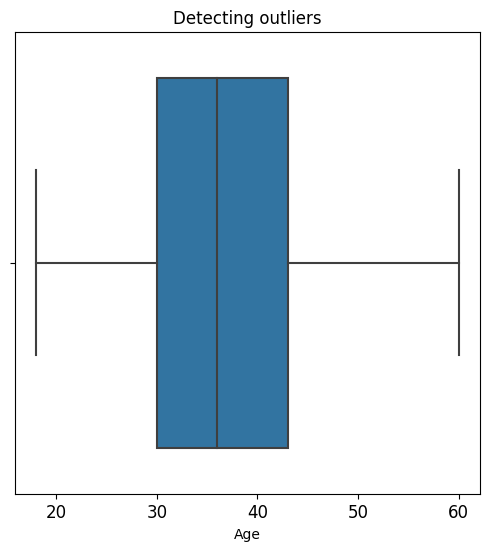

In [170]:
plt.figure(figsize=(6,6))
plt.title('Detecting outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=numerical_cols['Age'])
plt.show()

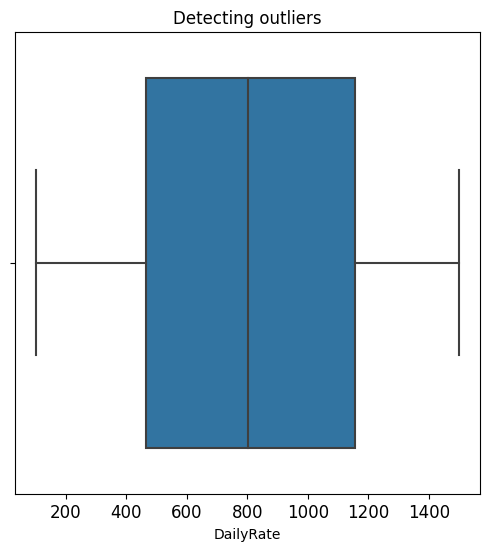

In [171]:
plt.figure(figsize=(6,6))
plt.title('Detecting outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=numerical_cols["DailyRate"])
plt.show()

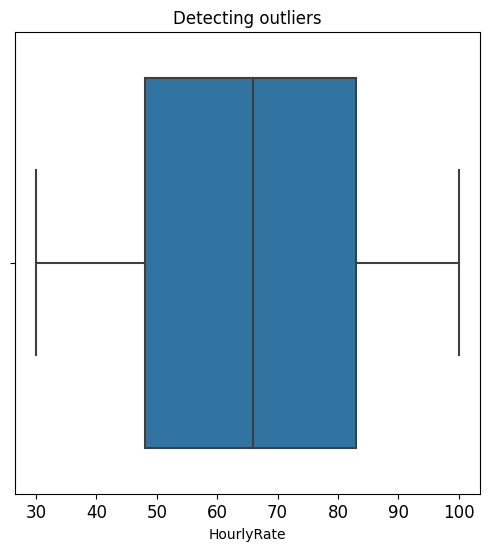

In [172]:
plt.figure(figsize=(6,6))
plt.title('Detecting outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=numerical_cols["HourlyRate"])
plt.show()

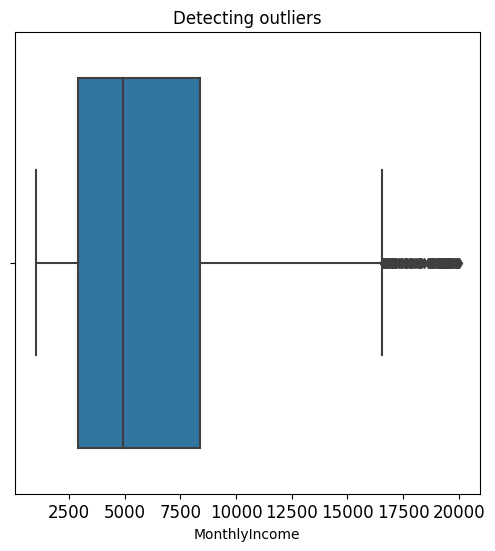

In [173]:
plt.figure(figsize=(6,6))
plt.title('Detecting outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=numerical_cols['MonthlyIncome'])
plt.show()

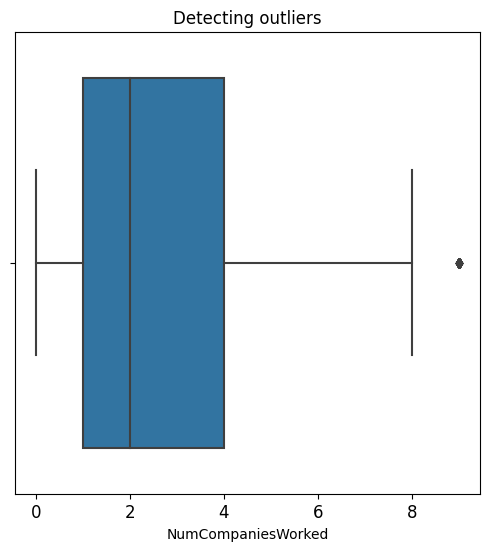

In [174]:
plt.figure(figsize=(6,6))
plt.title('Detecting outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=numerical_cols['NumCompaniesWorked'])
plt.show()

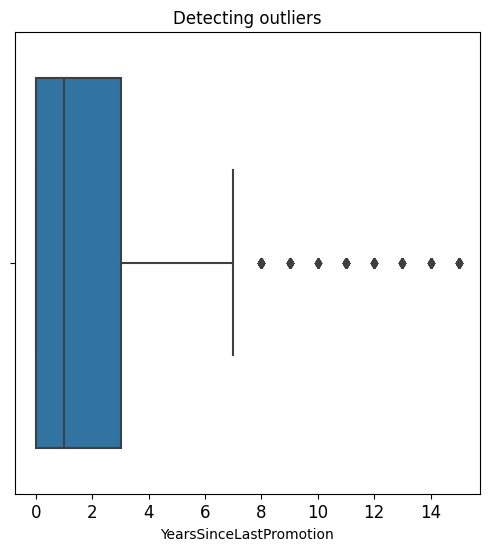

In [175]:
plt.figure(figsize=(6,6))
plt.title('Detecting outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=numerical_cols['YearsSinceLastPromotion'])
plt.show()

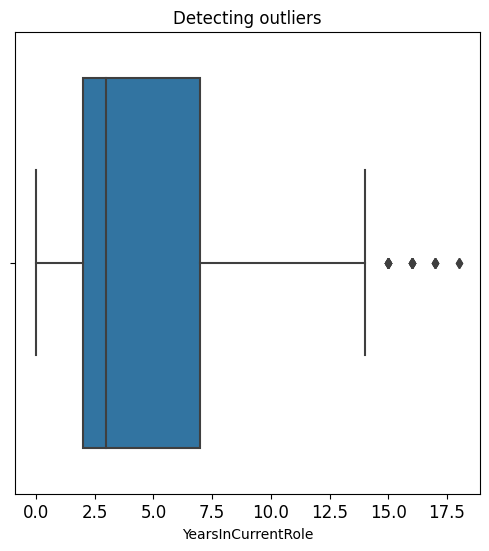

In [176]:
plt.figure(figsize=(6,6))
plt.title('Detecting outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=numerical_cols['YearsInCurrentRole'])
plt.show()

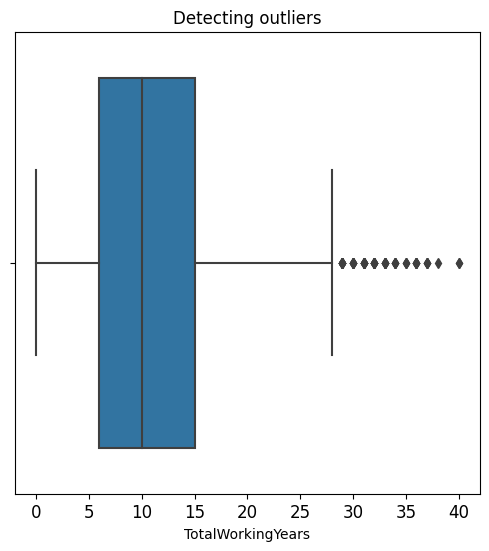

In [177]:
plt.figure(figsize=(6,6))
plt.title('Detecting outliers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=numerical_cols['TotalWorkingYears'])
plt.show()

In [178]:
#We'll collect all the outliers detected in a tuple so we can address them before ML
outliers_detected=("MonthlyIncome",'NumCompaniesWorked','YearsSinceLastPromotion','YearsInCurrentRole')
outliers_detected

('MonthlyIncome',
 'NumCompaniesWorked',
 'YearsSinceLastPromotion',
 'YearsInCurrentRole')

## Data check

In [179]:
hr_raw["Age"].describe()

count    1473.000000
mean       36.917176
std         9.130690
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [180]:
"""By checking at the age column, we get an interesting overview of the workers' profile. 
The mean age value and 50th percentile provide a similar result (36), which suggest age data is symmetrically distributed (this indicates there are no extreme outliers pulling the mean in any direction).

Standar deviation is 9,13, meaning most employees are aged between 27 and 45 years old.

25th percentile 30: 25% of employees are 30 years old or under
50th percentile 36: median indicates 50% of employees are 36 or under
75th percentile: 75% of the employees are 43 or under
Max age is 60

"""

"By checking at the age column, we get an interesting overview of the workers' profile. \nThe mean age value and 50th percentile provide a similar result (36), which suggest age data is symmetrically distributed (this indicates there are no extreme outliers pulling the mean in any direction).\n\nStandar deviation is 9,13, meaning most employees are aged between 27 and 45 years old.\n\n25th percentile 30: 25% of employees are 30 years old or under\n50th percentile 36: median indicates 50% of employees are 36 or under\n75th percentile: 75% of the employees are 43 or under\nMax age is 60\n\n"

## Data integrity check

## Dropping columns with no different values

### First we check the amount of values per column:

In [181]:
hr_raw.nunique()

EmpID                       1470
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
SalarySlab                     4
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptio

In [182]:
#Columns that have only one unique value are irrelevant to our analysis, so let's get rid of them:
columns_to_drop= []
columns=hr_raw.columns
for col in columns:
    if hr_raw[col].nunique()==1:
          columns_to_drop.append(col)



In [183]:
columns_to_drop
"""We must drop the following columns since they add no value to our analysis
 ['EmployeeCount', 'Over18', 'StandardHours']"""

"We must drop the following columns since they add no value to our analysis\n ['EmployeeCount', 'Over18', 'StandardHours']"

In [184]:
hr_raw=hr_raw.drop(columns=columns_to_drop)

In [185]:
hr_raw.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [186]:
#we will also drop employee number since it's irrelevant to our analysis

hr_raw=hr_raw.drop("EmployeeNumber",axis=1)

In [187]:
hr_raw.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Checking values for the rest of columns

In [188]:
#We will check the unique values to make sure they make sense
hr_raw["Age"].unique()

#Data is fine

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [189]:
hr_raw["AgeGroup"].unique()
#Data is fine

array(['18-25', '26-35', '36-45', '46-55', '55+'], dtype=object)

In [190]:
hr_raw["BusinessTravel"].unique()
#Issue: Similar data has been registered in two different ways Travel_Rarely TravelRarely. We will address this so to add up both values, also, we'll simplify the values by getting rid of the term "Travel" 

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely'],
      dtype=object)

In [191]:
hr_raw2=hr_raw.copy()

In [192]:
hr_raw["BusinessTravel"]=hr_raw["BusinessTravel"].replace("Travel_Rarely","TravelRarely")


In [193]:
hr_raw["BusinessTravel"] = hr_raw["BusinessTravel"].str.replace("Travel", "", regex=False) \
                                                    .str.replace("-","") \
                                                    .str.replace("_","") \
                                                    .str.replace("Non","No")


                                                

In [194]:
hr_raw['DailyRate'].unique()
#fine

array([ 230,  812, 1306,  287,  247, 1124,  544, 1431,  528, 1181,  602,
        303,  489,  419,  645,  504,  265,  871,  959, 1362,  500,  129,
       1097,  769,  805,  654, 1141,  727,  391,  996,  756,  895,  156,
       1343, 1427, 1334,  984,  251,  546,  337,  501, 1123,  534,  594,
       1256, 1136,  253, 1368,  604, 1230,  617,  217,  457, 1294,  581,
        541, 1309,  885,  650,  310, 1243,  373,  507,  977, 1320,  427,
        160,  571,  638,  673,  813, 1353, 1127, 1371, 1448,  535,  691,
        823, 1287,  693, 1092, 1269, 1206,  477, 1476,  381,  830,  350,
        567,  240,  506,  897,  771, 1280,  685,  675,  891,  688,  622,
        810,  883,  180,  141,  583,  867, 1219, 1356,  599,  266,  882,
       1372,  949,  383,  772,  309, 1382, 1357, 1443,  841, 1355, 1479,
        496, 1449,  950,  933,  575, 1349,  426,  775,  471,  703,  991,
       1146,  887, 1283, 1066,  342,  921,  192, 1330, 1384,  683,  652,
        474,  786,  390,  920,  572,  482, 1096,  1

In [195]:
 hr_raw["Department"].unique()
#fine

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [196]:
 hr_raw["DistanceFromHome"].unique()
#fine

array([ 3, 10,  5,  8,  1, 14, 22,  2, 21,  9, 25,  6,  4, 11, 15, 12, 18,
        7, 16, 19, 26, 20, 24, 23, 17, 13, 29, 28, 27], dtype=int64)

In [197]:
hr_raw['Education'].unique()

array([3, 2, 1, 4, 5], dtype=int64)

In [198]:
hr_raw.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Transforming the attrition into a non binary new column

<p>First, we determine the amount of employees who left the company and the ones that are still in the company</p>

In [199]:
hr_raw["Attrition"].value_counts()

No     1236
Yes     237
Name: Attrition, dtype: int64

In [200]:
#We get a subpopulation of employees who have left so to determine the reasons why
hr_raw_left=hr_raw[hr_raw["Attrition"]=="Yes"]

In [201]:
def left(i):
    if i=="Yes":
     return 1
    else:
       return 0

In [202]:
hr_raw["left_company"]=hr_raw2["Attrition"].apply(left)

In [203]:
hr_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1473 non-null   object 
 1   Age                       1473 non-null   int64  
 2   AgeGroup                  1473 non-null   object 
 3   Attrition                 1473 non-null   object 
 4   BusinessTravel            1473 non-null   object 
 5   DailyRate                 1473 non-null   int64  
 6   Department                1473 non-null   object 
 7   DistanceFromHome          1473 non-null   int64  
 8   Education                 1473 non-null   int64  
 9   EducationField            1473 non-null   object 
 10  EnvironmentSatisfaction   1473 non-null   int64  
 11  Gender                    1473 non-null   object 
 12  HourlyRate                1473 non-null   int64  
 13  JobInvolvement            1473 non-null   int64  
 14  JobLevel

In [204]:
hr_raw.to_csv("CleanedHRdata.csv")